In [1]:
import glob
from PIL import Image, ImageFont, ImageDraw, ExifTags
import os
import tqdm.notebook

import os
import shutil

In [2]:

base_dir = '../2_horiz/orig/'

In [3]:
files = glob.glob(base_dir+'*.jpg')

In [4]:
len(files)

5285

In [9]:
import matplotlib.pyplot as plt

In [10]:
data = [os.stat(file).st_size for file in files]

In [14]:
import numpy as np

In [15]:
data = np.array(data)

In [19]:
os.path.getsize(files[0])

1108466

In [21]:
files[0]

'../2_horiz/orig/photo_2022-02-17_08-25.jpg'

In [20]:
os.stat(files[0]).st_size

1108466

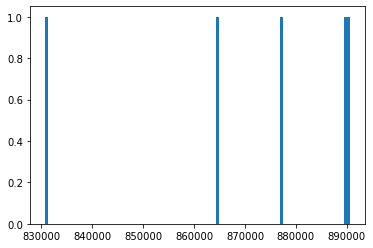

In [36]:
plt.hist(data[(data >500000) & (data <900000)], bins=100)
plt.show()

In [ ]:

fs = list()

In [8]:
os.stat(files[0]).st_size

1108466

In [9]:
def get_date(path):
    img = Image.open(path)
    return img._getexif()[306]

In [10]:
os.makedirs(base_dir+'../renamed', exist_ok=True)

In [27]:
6*10**5

600000

In [37]:
print(len(files))
files = list(filter(lambda x: os.path.getsize(x)> 5*10**5, files))
print(len(files))

4280
4280


In [11]:
files = list(sorted(files, key=lambda x: get_date(x)))

In [24]:
title_font = ImageFont.truetype('cour.ttf', 30)

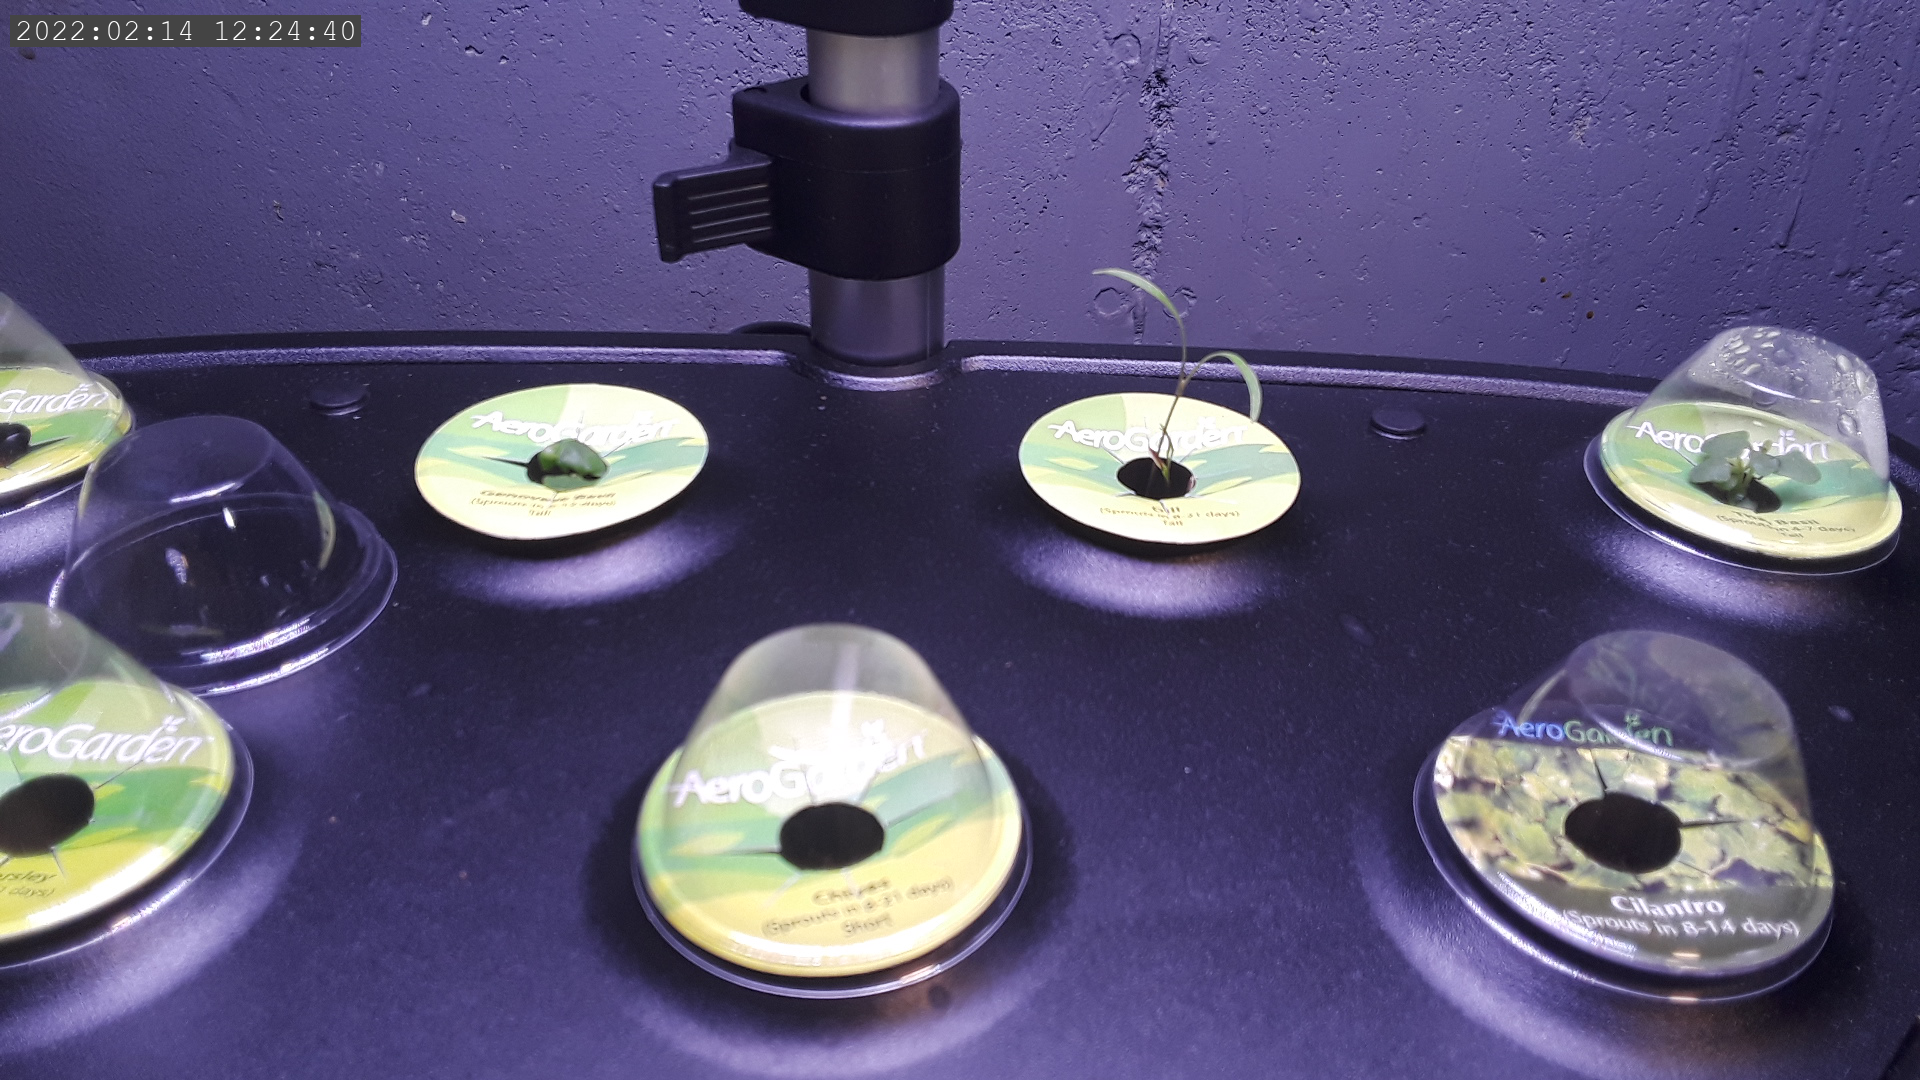

In [47]:
img=Image.open(files[0])

title_text = img._getexif()[306]

image_editable = ImageDraw.Draw(img)
image_editable.rectangle((10, 15, 360, 46), fill ="#444444")
image_editable.text((15,15), title_text, (255, 255, 255), font=title_font)

img

In [51]:
for k, v in img._getexif().items():
    print(ExifTags.TAGS.get(k, k), v)

ExifVersion b'0220'
ShutterSpeedValue 5.84
ApertureValue 1.85
DateTimeOriginal 2022:02:14 12:24:40
DateTimeDigitized 2022:02:14 12:24:40
BrightnessValue 3.7
ExposureBiasValue 0.0
MaxApertureValue 1.85
MeteringMode 2
Flash 0
FlashPixVersion b'0100'
FocalLength 2.9
UserComment b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
ColorSpace 1
ComponentsConfiguration b'\x01\x02\x03\x00'
ExifImageWidth 1920
SubsecTime 477 
SubsecTimeOriginal 477 
SubsecTimeDigitized 477 
ExifImageHeight 1080
Model SAMSUNG-SM-J727A
Orientation 1
YCbCrPositioning 1
Make samsung
ExposureTime 0.017543859649122806
ExifInteroperabilityOffset 695
XResolution 72.0
FNumber 1.9
YResolution 72.0
ExposureProgram 2
ISOSpeedRatings 100
ResolutionUnit 2
ExposureMode 0
WhiteBalance 0
Software J727AUCS4BRL1
DateTime 2022:02:14 12:24:40
FocalLengthIn35mmFilm 28
SceneCaptureType 0
ExifOffset 209


# No Rotation

In [29]:
len(files)

974

In [30]:
files[0]

'../Aerogarden/2_horiz/orig/photo_2022-02-14_12-24.jpg'

In [31]:
base_dir

'../Aerogarden/2_horiz/orig/'

In [32]:
for i, file in enumerate(tqdm.notebook.tqdm(files)):
    #     print(f"{i:04}")
    shutil.copyfile(file, os.path.join(base_dir,'../renamed', f'{i:05}.jpg'))

In [25]:
!pwd

/home/shmalex/Videos/1_vertical


In [24]:
os.path.join(base_dir,'renamed')

'../Aerogarden/2_horiz/orig/renamed'

# Rotate Image

In [ ]:
angle = -90
for i, file in enumerate(files):
    print(f"{i:04}")
    img = PIL.Image.open(file)
    out = img.rotate(angle, expand=True)
    out.save(os.path.join('./renamed', f'{i:04}.jpg'))

In [2]:
os

NameError: name 'os' is not defined

In [ ]:
ffmpeg -r 25 -f image2 -i '%4d.jpg' -c:v mjpeg -crf 30 ../video_fps25.mp4

ffmpeg -r 120 -f image2 -s 211,72 -i %7d.jpeg -c:v mjpeg -crf 60 ../video_fps120.mp4
!cd ./renamed
!ffmpeg -r 30 -f image2 -i '%4d.jpg' -c:v mjpeg -crf 30 ../video_fps30.mp4